In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, concatenate

def unet_bt(pretrained_weights=None, input_size=(256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), strides = 2)(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), strides = 2)(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), strides = 2)(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), strides = 2)(drop4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)
    model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.load_weights('/content/drive/MyDrive/U-net/weights.hdf5')
    return model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def cnn_bt(pretrained_weights=None, input_shape=(256,256,1)):
    model = Sequential()
    model.add(Conv2D(32, 4, activation = 'relu', padding = 'same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, 4, activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64, 4, activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    model.load_weights(pretrained_weights)
    return model

1/1 [==============================] - 6s 6s/step
THE ORIGINAL IMAGE IS 


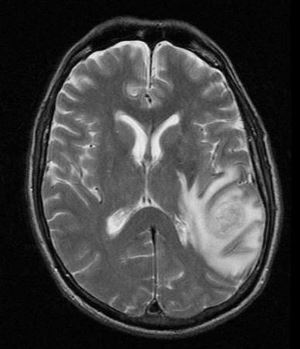

TUMOUR DETECTED IN THE MRI.
1/1 [==============================] - 2s 2s/step


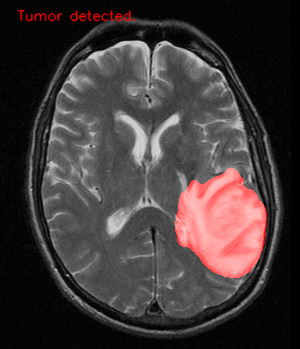

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam
import skimage.transform as trans
from google.colab.patches import cv2_imshow


image_path = '/content/drive/MyDrive/TEST IMAGES FOR BRAIN TUMOUR/t (3).JPG'
cnn_weight = '/content/drive/MyDrive/CNN/weights.hdf5'
unet_weight='/content/drive/MyDrive/U-net/weights.hdf5'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image / 255
image = trans.resize(image,(256,256))

x = []
x.append(image)
x = np.array(x)
x = np.reshape(x, (1, 256, 256, 1))



cnn = cnn_bt(pretrained_weights=cnn_weight)
pd_cnn = cnn.predict(x)

if pd_cnn[0][0] > 0.5:

    print("THE ORIGINAL IMAGE IS ")
    mri = cv2.imread(image_path)

    cv2_imshow(mri)
    print('TUMOUR DETECTED IN THE MRI.')
    org = cv2.imread(image_path)
    rows, cols, channels = org.shape

    unet= unet_bt()
    unet.compile(optimizer = Adam(), loss = 'binary_crossentropy')
    predicted = unet.predict(np.reshape(image, (1, 256, 256, 1)))


    predicted = predicted.astype(np.float64) * 255
    predicted = np.reshape(predicted, (256, 256))
    predicted = trans.resize(predicted, (rows,cols))
    predicted = predicted.astype(np.uint8)
    predicted = cv2.cvtColor(predicted, cv2.COLOR_GRAY2BGR)


    ret, mask = cv2.threshold(predicted, 120, 255, cv2.THRESH_BINARY)
    white_pixels = np.where((mask[:, :, 0] == 255) &
                            (mask[:, :, 1] == 255) &
                            (mask[:, :, 2] == 255))
    mask[white_pixels] = [0, 0, 255]
    add = cv2.addWeighted(org, 0.9, mask, 0.7, 0)


    add = cv2.putText(add,
                     'Tumor detected.',
                     (int(rows/20),int(cols/15)),
                     cv2.FONT_HERSHEY_SIMPLEX,
                     cols/(rows+cols),
                     (0,0,255),
                     1,
                     cv2.LINE_AA)
    cv2_imshow(add)


else:
    print("THE ORIGINAL IMAGE IS ")
    mri=cv2.imread(image_path)
    cv2_imshow(mri)
    print('no tumor detected.')
    org = cv2.imread(image_path)
    rows, cols, channels = org.shape
    org = cv2.putText(org,
                     'No tumor detected.',
                     (int(rows/20),int(cols/15)),
                     cv2.FONT_HERSHEY_SIMPLEX,
                     cols/(rows+cols),
                     (0,255,0),
                     1,
                     cv2.LINE_AA)
    cv2_imshow(org)
cv2.waitKey(0)
cv2.destroyAllWindows()